In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create Longitudinal Speckles

In [4]:
for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )



INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create circumferential speckles

In [5]:
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

## Radial distance (radius)

Using some subset for numerical validation

Using 'base' subset as reference, we expect a radius of 30 and ~24.5 at first and last timesteps, respectively. 

Expected values for timesteps [0, 0.1 and 1.1]:

- Endo (approx):    25,  17,  17.5
- Epi (approx):     35,  32,  32
- Mean:             30,  24.5,  24.75

In [6]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
_ = lv.radial_distance(circ_spks, recompute=True, log_level=logging.DEBUG, approach="moving_vector")

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_DISTANCE'
DEBUG:LV.BaseMetricsComputations:Computing speckle RADIAL_DISTANCE for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:Using approach: 'moving_vector'
DEBUG:LV.BaseMetricsComputations:-mean_coords:'[[ 11.7251552  -13.09415418   3.38270809]
 [ 11.66353012 -13.12225035   4.89214629]
 [ 17.34996591  -3.42392699   3.41245375]
 [ 17.33773257  -3.49718973   4.92788363]
 [ 16.79656189  -5.6310522    3.41579301]
 [ 16.74272482  -5.68746794   4.92309547]
 [ 15.86185613  -7.70434593   3.40517685]
 [ 15.84503291  -7.78023697   4.91926323]
 [ 14.71062753  -9.66344379   3.39893756]
 [ 14.6641621   -9.71747725   4.91737107]
 [ 13.31482267 -11.46148857   3.39059882]
 [ 13.25719842 -11.50510457   4.9068541 ]
 [  9.92359368 -14.4964902    3.39291388]
 [  9.86090624 -14.51465891   4.89966165]
 [ 12.52958295 -12.28519234   3.38437949]
 [ 11.69447274 -13.10795

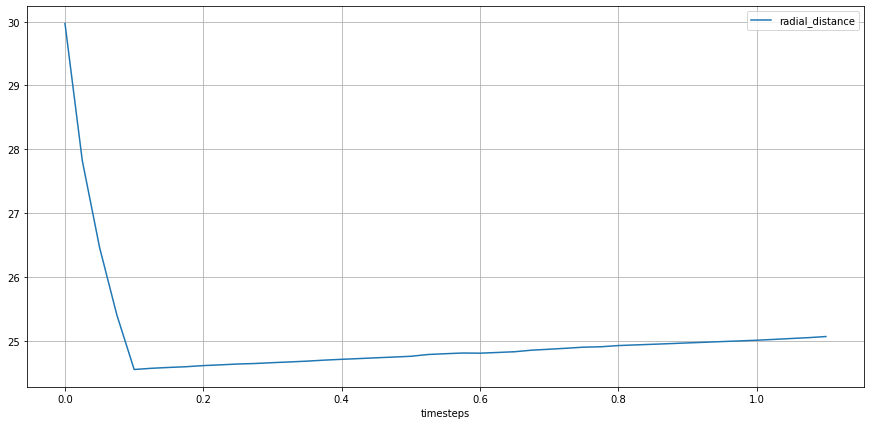

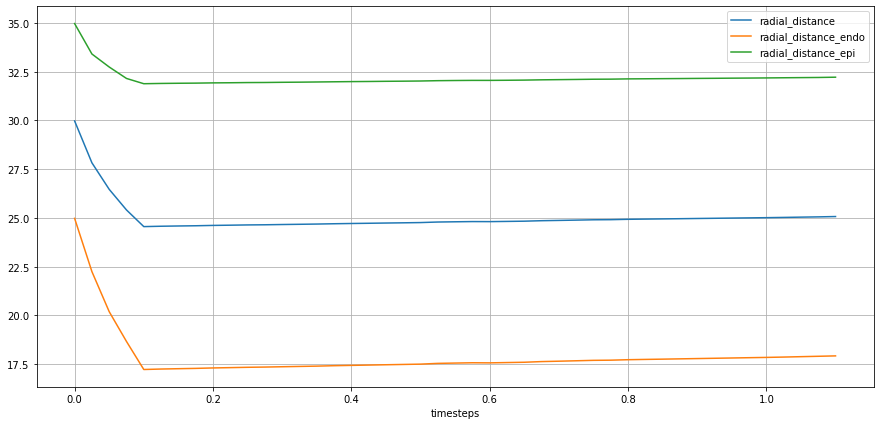

In [7]:
lv.plot_metric(lv.STATES.RADIAL_DISTANCE, 
    from_ts=0.0, plot_infos=["group"])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_DISTANCE'


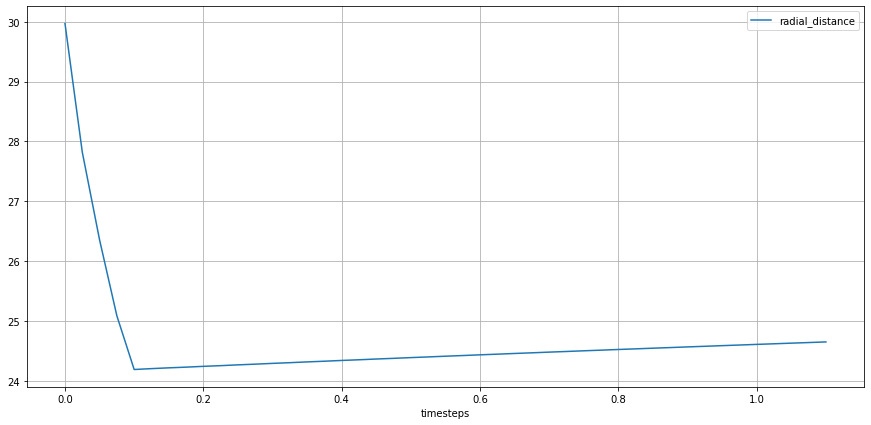

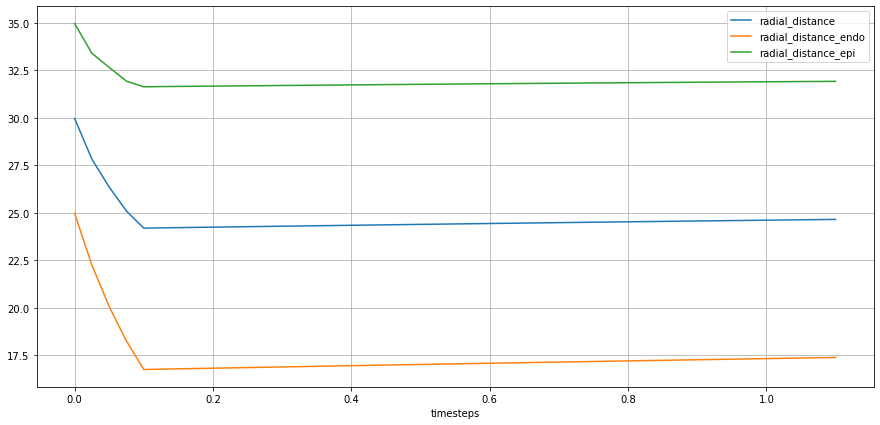

In [8]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.radial_distance(circ_spks, recompute=True, log_level=logging.INFO, approach="fixed_vector")
lv.plot_metric(lv.STATES.RADIAL_DISTANCE, 
    from_ts=0.0, plot_infos=["group"])

## Radial length

In [9]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
_ = lv.radial_length(circ_spks, recompute=True, log_level=logging.DEBUG, approach="moving_centers")

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
DEBUG:LV.BaseMetricsComputations:Computing speckle RADIAL_LENGTH for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:Using approach: 'moving_centers'
DEBUG:LV.BaseMetricsComputations:Computing speckle center for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:-k: '0.8'
-apex:'[[ 4.11747285e-01  3.04612883e-02 -7.37853499e+01]
 [ 3.03835156e-01 -2.73065036e-01 -7.04355481e+01]
 [ 1.92623766e+00 -3.85460715e-01 -6.57730777e+01]
 [ 3.30105231e+00 -5.93683499e-01 -6.32161435e+01]
 [ 3.00680368e+00 -1.23117980e+00 -5.99180196e+01]
 [ 3.00664849e+00 -1.23397905e+00 -5.99115570e+01]
 [ 3.00636284e+00 -1.23743854e+00 -5.99123348e+01]
 [ 3.00603044e+00 -1.24097718e+00 -5.99215813e+01]
 [ 3.04485662e+00 -1.24446678e+00 -5.99195705e+01]
 [ 3.04455516e+00 -1.24817164e+00 -5.99282152e+

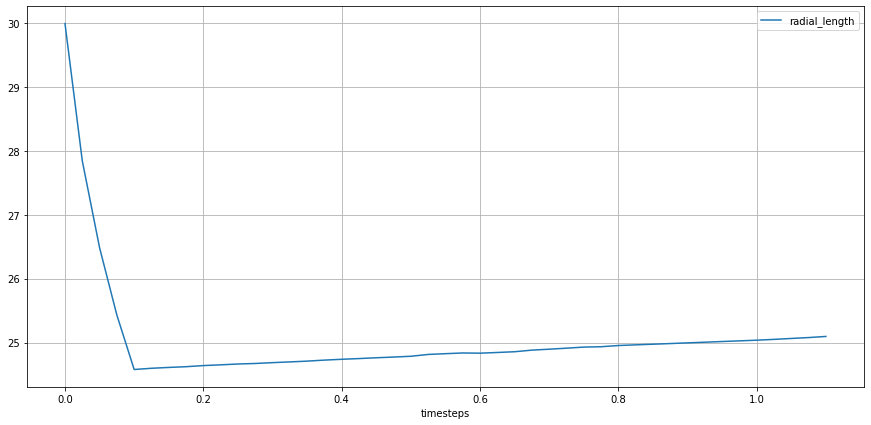

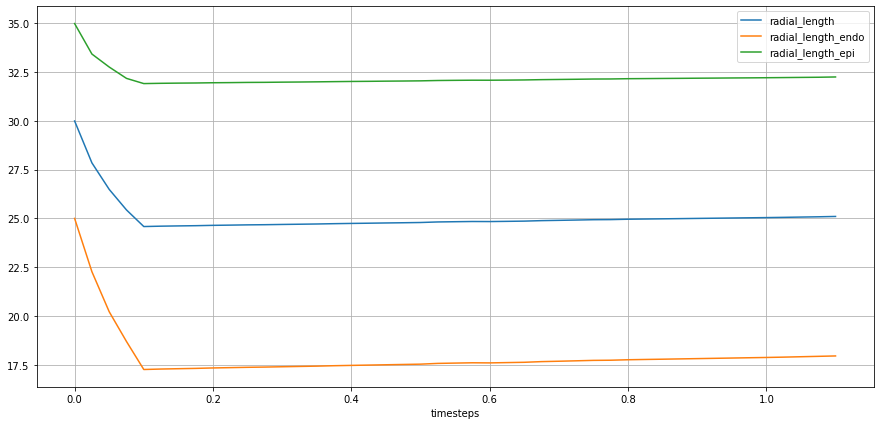

In [10]:
lv.plot_metric(lv.STATES.RADIAL_LENGTH, 
    from_ts=0.0, plot_infos=["group"])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
DEBUG:LV.BaseMetricsComputations:Computing speckle RADIAL_LENGTH for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:Using approach: 'fixed_centers'
DEBUG:LV.BaseMetricsComputations:-mean_coords:'[[ 11.7251552  -13.09415418   3.38270809]
 [ 11.66353012 -13.12225035   4.89214629]
 [ 17.34996591  -3.42392699   3.41245375]
 [ 17.33773257  -3.49718973   4.92788363]
 [ 16.79656189  -5.6310522    3.41579301]
 [ 16.74272482  -5.68746794   4.92309547]
 [ 15.86185613  -7.70434593   3.40517685]
 [ 15.84503291  -7.78023697   4.91926323]
 [ 14.71062753  -9.66344379   3.39893756]
 [ 14.6641621   -9.71747725   4.91737107]
 [ 13.31482267 -11.46148857   3.39059882]
 [ 13.25719842 -11.50510457   4.9068541 ]
 [  9.92359368 -14.4964902    3.39291388]
 [  9.86090624 -14.51465891   4.89966165]
 [ 12.52958295 -12.28519234   3.38437949]
 [ 11.69447274 -13.10795476 

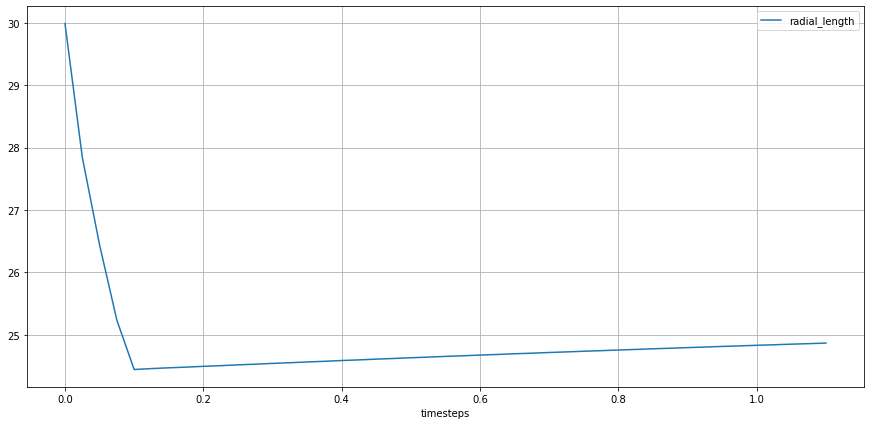

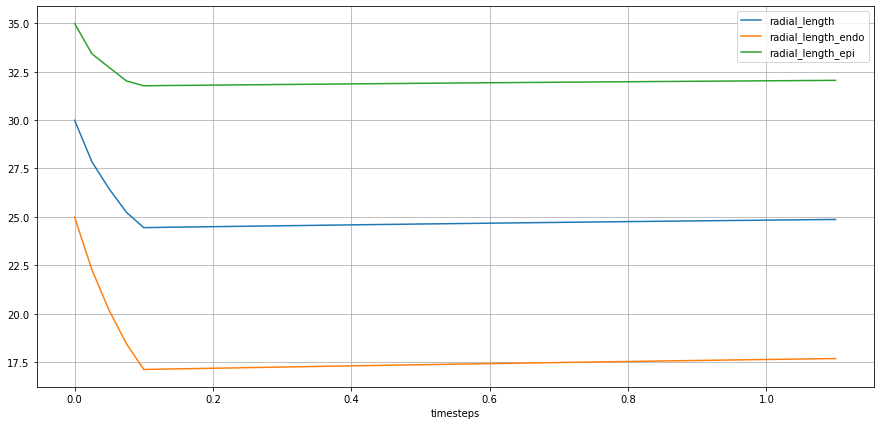

In [11]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
_ = lv.radial_length(circ_spks, recompute=True, log_level=logging.DEBUG, approach="fixed_centers")
lv.plot_metric(lv.STATES.RADIAL_LENGTH, 
    from_ts=0.0, plot_infos=["group"])

## Using all avaiable speckles:

Radial distance:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_DISTANCE'


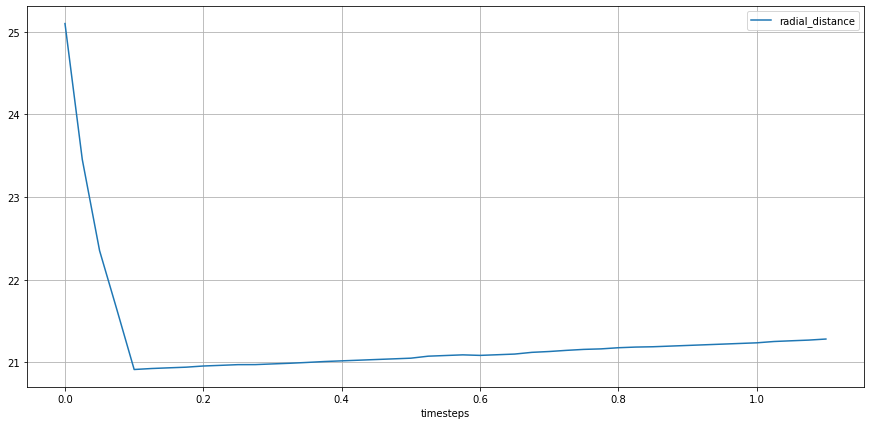

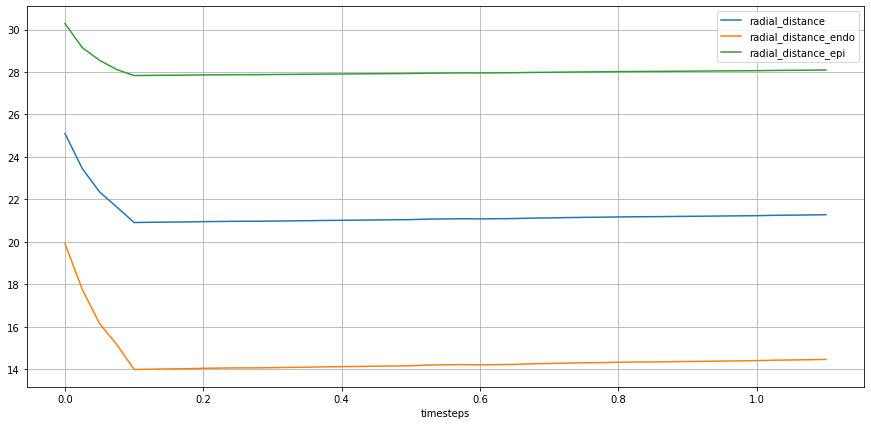

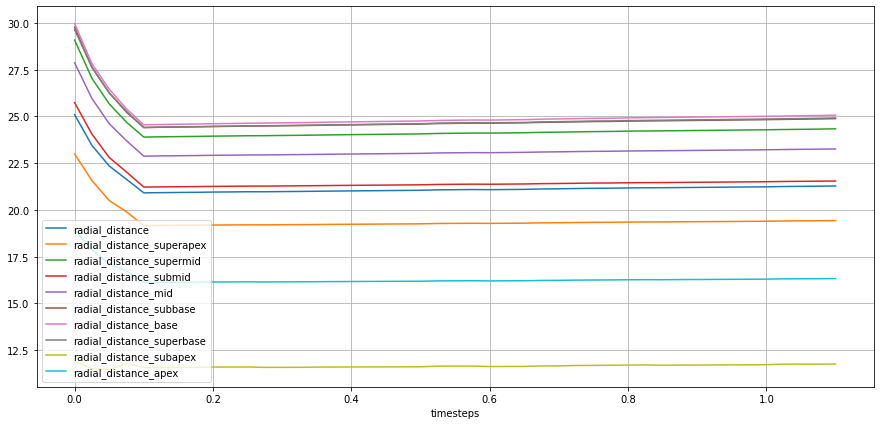

In [12]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
radial_dist = lv.radial_distance(circ_spks, 
                                 reduce_by={"group", "name"},
                                 approach="moving_vector",
                                 recompute=True, log_level=logging.INFO)
lv.plot_metric(lv.STATES.RADIAL_DISTANCE, 
    from_ts=0.0, plot_infos=["group", "name"])

Radial Length:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'


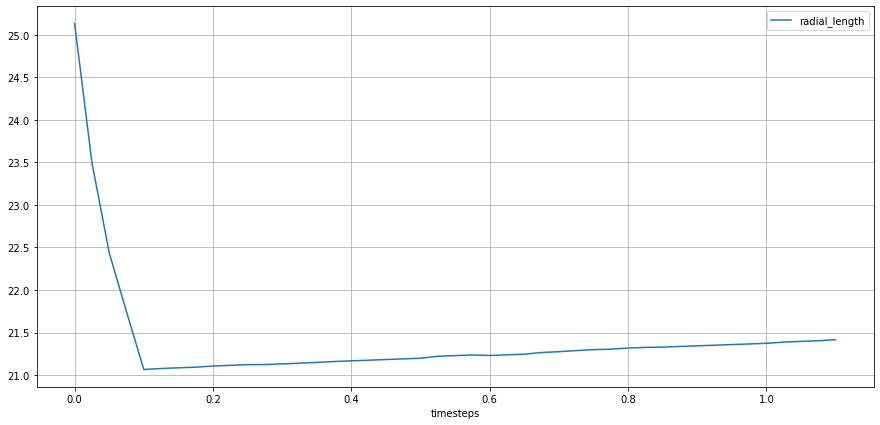

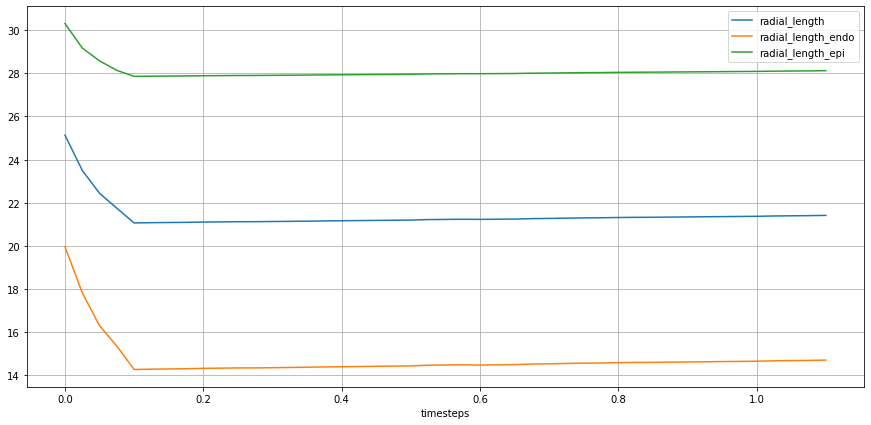

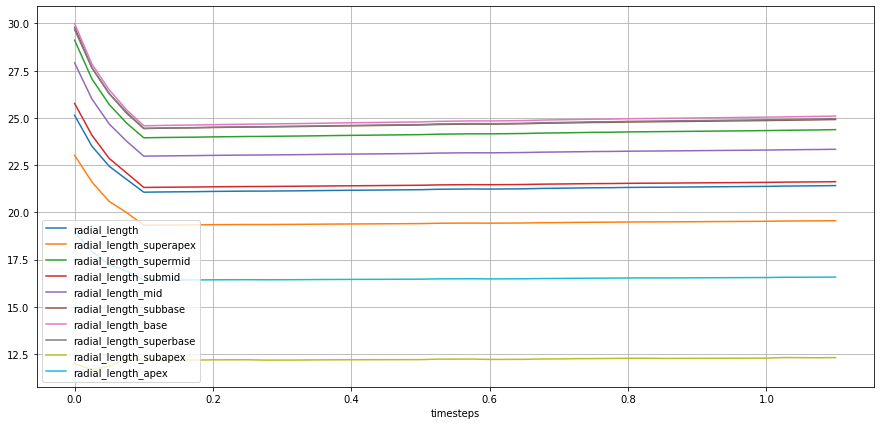

In [13]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
radial_length = lv.radial_length(circ_spks, 
                                 recompute=True, 
                                 reduce_by={"group", "name"},
                                 approach="moving_centers",
                                 log_level=logging.INFO)
lv.plot_metric(lv.STATES.RADIAL_LENGTH, 
    from_ts=0.0, plot_infos=["group", "name"])

## Compare both methods:

In [14]:
radial_dist.reshape((-1,1)).shape

(45, 1)

In [16]:
lv.timesteps()

array([0.        , 0.025     , 0.05      , 0.075     , 0.1       ,
       0.125     , 0.15000001, 0.175     , 0.2       , 0.22499999,
       0.25      , 0.27500001, 0.30000001, 0.32499999, 0.34999999,
       0.375     , 0.40000001, 0.42500001, 0.44999999, 0.47499999,
       0.5       , 0.52499998, 0.55000001, 0.57499999, 0.60000002,
       0.625     , 0.64999998, 0.67500001, 0.69999999, 0.72500002,
       0.75      , 0.77499998, 0.80000001, 0.82499999, 0.85000002,
       0.875     , 0.89999998, 0.92500001, 0.94999999, 0.97500002,
       1.        , 1.02499998, 1.04999995, 1.07500005, 1.10000002])

<AxesSubplot:xlabel='timestep'>

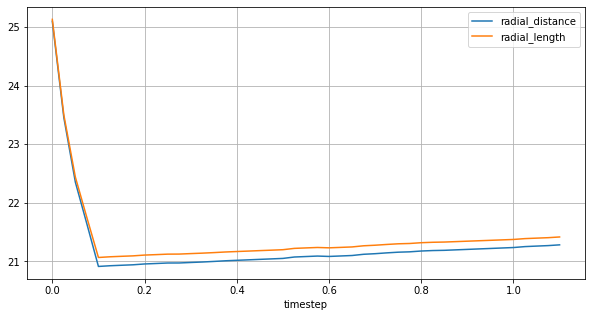

In [20]:
import pandas as pd


data = np.hstack([lv.timesteps().reshape((-1,1)), 
                  radial_dist.reshape((-1,1)), 
                  radial_length.reshape((-1,1))])

df = pd.DataFrame(data,columns=["timestep", "radial_distance", "radial_length"])
df.plot(x="timestep", figsize=(10,5), grid=True)